<a href="https://colab.research.google.com/github/jc020230/2026-1-basic-practice-Kwak-/blob/main/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.21.1 requires keras-hub==0.21.1, but you have keras-hub 0.26.0 which is incompatible.


In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [ ]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## Fundamentals of machine learning

### Generalization: The goal of machine learning

#### Underfitting and overfitting

##### Noisy training data

##### Ambiguous features

##### Rare features and spurious correlations

In [ ]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import keras
from keras import layers

def get_model():
    model = keras.Sequential(
        [
            layers.Dense(512, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8632 - loss: 0.4596 - val_accuracy: 0.9193 - val_loss: 0.2723
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9291 - loss: 0.2358 - val_accuracy: 0.9406 - val_loss: 0.2082
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9514 - loss: 0.1628 - val_accuracy: 0.9480 - val_loss: 0.1797
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1203 - val_accuracy: 0.9485 - val_loss: 0.1687
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0862 - val_accuracy: 0.9568 - val_loss: 0.1488
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0627 - val_accuracy: 0.9511 - val_loss: 0.1536
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0460 - val_accuracy: 0.9590 - val_loss: 0.1348
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0333 - val_accuracy: 0.

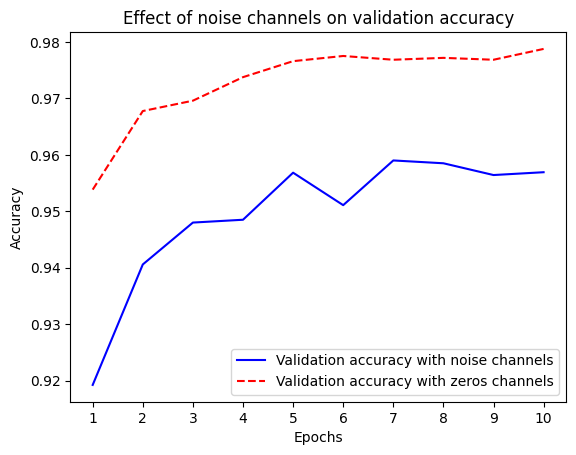

In [ ]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(
    epochs,
    val_acc_noise,
    "b-",
    label="Validation accuracy with noise channels",
)
plt.plot(
    epochs,
    val_acc_zeros,
    "r--",
    label="Validation accuracy with zeros channels",
)
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### The nature of generalization in deep learning

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1035 - loss: 2.3156 - val_accuracy: 0.1111 - val_loss: 2.3030
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1170 - loss: 2.2990 - val_accuracy: 0.1107 - val_loss: 2.3065
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1254 - loss: 2.2914 - val_accuracy: 0.1005 - val_loss: 2.3162
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1394 - loss: 2.2793 - val_accuracy: 0.0987 - val_loss: 2.3256
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1516 - loss: 2.2641 - val_accuracy: 0.1017 - val_loss: 2.3336
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1633 - loss: 2.2449 - val_accuracy: 0.1002 - val_loss: 2.3451
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1798 - loss: 2.2216 - val_accuracy: 0.1033 - val_loss: 2.3643
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1969 - loss: 2.1955 - val_accu

##### The manifold hypothesis

##### Interpolation as a source of generalization

##### Why deep learning works

##### Training data is paramount

### Evaluating machine-learning models

#### Training, validation, and test sets

##### Simple hold-out validation

##### K-fold validation

##### Iterated K-fold validation with shuffling

#### Beating a common-sense baseline

#### Things to keep in mind about model evaluation

### Improving model fit

#### Tuning key gradient descent parameters

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1.0),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0990 - loss: 14.4890 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5191 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - val_accuracy: 0.0997 - val_loss: 14.5117
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0992 - loss: 14.5190 - v

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-2),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9089 - loss: 0.3843 - val_accuracy: 0.9532 - val_loss: 0.1600
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1255 - val_accuracy: 0.9652 - val_loss: 0.1318
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9752 - loss: 0.0941 - val_accuracy: 0.9692 - val_loss: 0.1335
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9794 - loss: 0.0796 - val_accuracy: 0.9674 - val_loss: 0.1626
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0708 - val_accuracy: 0.9711 - val_loss: 0.1384
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9852 - loss: 0.0647 - val_accuracy: 0.9745 - val_loss: 0.1565
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9875 - loss: 0.0536 - val_accuracy: 0.9742 - val_loss: 0.1605
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9883 - loss: 0.0524 - val_accuracy: 0.

#### Using better architecture priors

#### Increasing model capacity

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_small_model = model.fit(
    train_images, train_labels, epochs=20, batch_size=128, validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8337 - loss: 0.6713 - val_accuracy: 0.9040 - val_loss: 0.3616
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9022 - loss: 0.3545 - val_accuracy: 0.9130 - val_loss: 0.3116
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9105 - loss: 0.3188 - val_accuracy: 0.9172 - val_loss: 0.2951
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9151 - loss: 0.3024 - val_accuracy: 0.9207 - val_loss: 0.2849
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9182 - loss: 0.2926 - val_accuracy: 0.9210 - val_loss: 0.2806
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9201 - loss: 0.2856 - val_accuracy: 0.9224 - val_loss: 0.2761
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9214 - loss: 0.2808 - val_accuracy: 0.9249 - val_loss: 0.2737
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9240 - loss: 0.2766 - val_accuracy: 0.

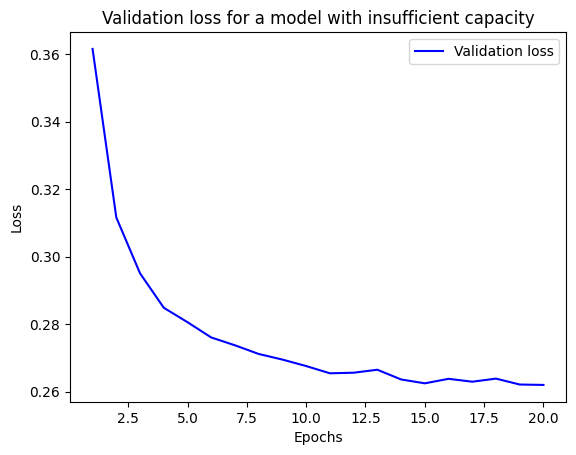

In [ ]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with insufficient capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9010 - loss: 0.3441 - val_accuracy: 0.9499 - val_loss: 0.1692
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.1439 - val_accuracy: 0.9643 - val_loss: 0.1239
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0987 - val_accuracy: 0.9695 - val_loss: 0.1020
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0720 - val_accuracy: 0.9733 - val_loss: 0.0920
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.0570 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9712 - val_loss: 0.1040
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9726 - val_loss: 0.0983
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.

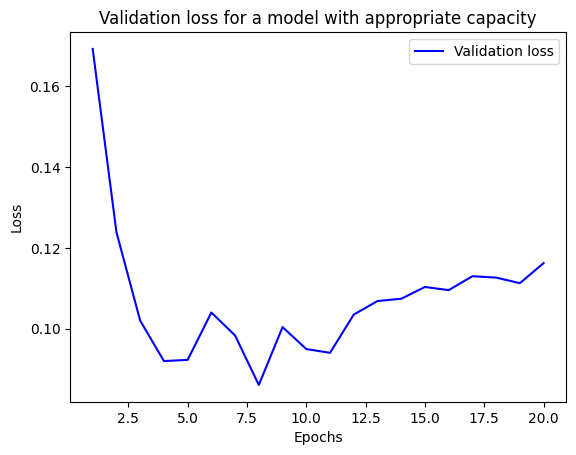

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history_very_large_model = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9281 - loss: 0.2510 - val_accuracy: 0.9579 - val_loss: 0.1545
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9692 - loss: 0.1152 - val_accuracy: 0.9689 - val_loss: 0.1231
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0836 - val_accuracy: 0.9769 - val_loss: 0.1172
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0672 - val_accuracy: 0.9693 - val_loss: 0.1592
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9868 - loss: 0.0559 - val_accuracy: 0.9778 - val_loss: 0.1320
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9898 - loss: 0.0450 - val_accuracy: 0.9745 - val_loss: 0.1557
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9907 - loss: 0.0415 - val_accuracy: 0.9766 - val_loss: 0.1276
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0318 - 

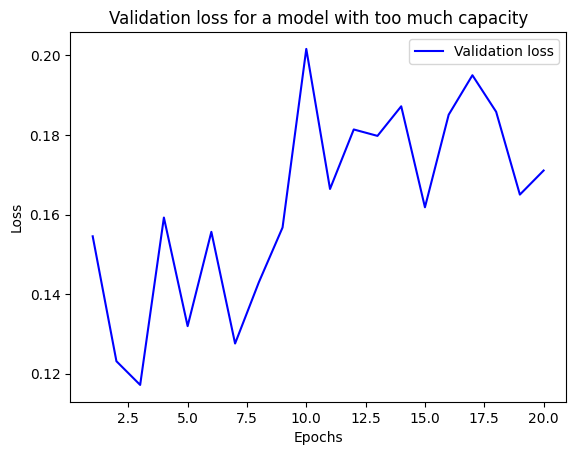

In [ ]:
val_loss = history_very_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-", label="Validation loss")
plt.title("Validation loss for a model with too much capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Improving generalization

#### Dataset curation

#### Feature engineering

#### Using early stopping

#### Regularizing your model

##### Reducing the network's size

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

train_data = vectorize_sequences(train_data)

model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_original = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7399 - loss: 0.5876 - val_accuracy: 0.8531 - val_loss: 0.4917
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8809 - loss: 0.4006 - val_accuracy: 0.8720 - val_loss: 0.3685
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9103 - loss: 0.2965 - val_accuracy: 0.8872 - val_loss: 0.3122
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9305 - loss: 0.2332 - val_accuracy: 0.8891 - val_loss: 0.2902
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9397 - loss: 0.1931 - val_accuracy: 0.8851 - val_loss: 0.2928
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9502 - loss: 0.1638 - val_accuracy: 0.8886 - val_loss: 0.2792
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9577 - loss: 0.1399 - val_accuracy: 0.8730 - val_loss: 0.3262
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accurac

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(4, activation="relu"),
        layers.Dense(4, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_smaller_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7639 - loss: 0.5695 - val_accuracy: 0.8346 - val_loss: 0.4802
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8837 - loss: 0.3994 - val_accuracy: 0.8703 - val_loss: 0.3771
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9077 - loss: 0.3098 - val_accuracy: 0.8835 - val_loss: 0.3237
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9201 - loss: 0.2541 - val_accuracy: 0.8805 - val_loss: 0.3067
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9320 - loss: 0.2156 - val_accuracy: 0.8867 - val_loss: 0.2863
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9418 - loss: 0.1876 - val_accuracy: 0.8858 - val_loss: 0.2856
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9488 - loss: 0.1659 - val_accuracy: 0.8873 - val_loss: 0.2815
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9552 - loss: 0.1477 - val_accuracy: 0.8832 - v

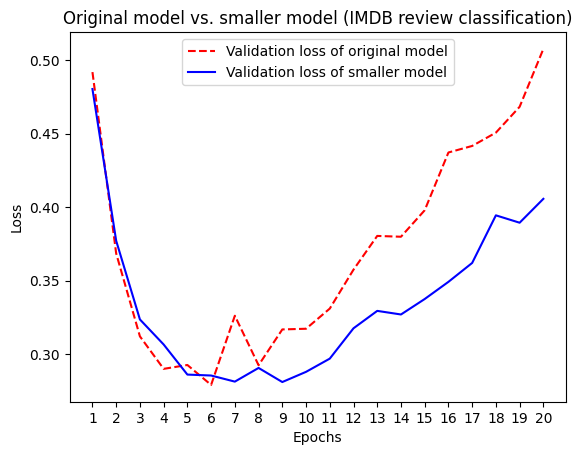

In [ ]:
original_val_loss = history_original.history["val_loss"]
smaller_model_val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    smaller_model_val_loss,
    "b-",
    label="Validation loss of smaller model",
)
plt.title("Original model vs. smaller model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_larger_model = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7265 - loss: 0.5619 - val_accuracy: 0.7600 - val_loss: 0.4925
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8629 - loss: 0.3331 - val_accuracy: 0.8872 - val_loss: 0.2805
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9074 - loss: 0.2326 - val_accuracy: 0.8612 - val_loss: 0.3284
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9255 - loss: 0.1910 - val_accuracy: 0.8494 - val_loss: 0.4046
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9410 - loss: 0.1549 - val_accuracy: 0.8776 - val_loss: 0.3058
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9586 - loss: 0.1140 - val_accuracy: 0.8860 - val_loss: 0.3110
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9746 - loss: 0.0776 - val_accuracy: 0.8860 - val_loss: 0.3503
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9767 - loss: 0.0780 - val_accuracy: 0.8819 - v

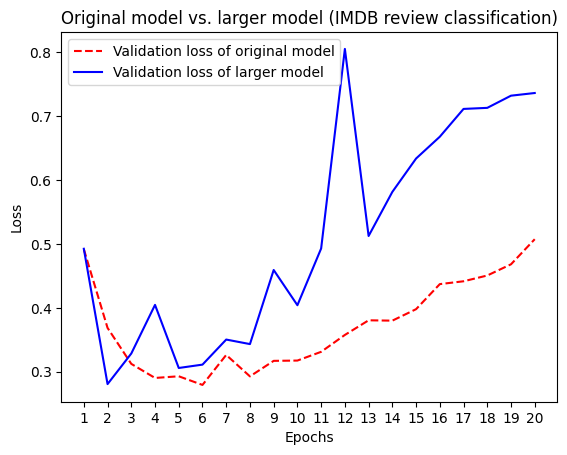

In [ ]:
original_val_loss = history_original.history["val_loss"]
larger_model_val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    larger_model_val_loss,
    "b-",
    label="Validation loss of larger model",
)
plt.title("Original model vs. larger model (IMDB review classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

##### Adding weight regularization

In [ ]:
from keras.regularizers import l2

model = keras.Sequential(
    [
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(16, kernel_regularizer=l2(0.002), activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.7641 - loss: 0.6480 - val_accuracy: 0.8645 - val_loss: 0.5193
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8847 - loss: 0.4506 - val_accuracy: 0.8716 - val_loss: 0.4328
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9073 - loss: 0.3650 - val_accuracy: 0.8839 - val_loss: 0.3834
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9192 - loss: 0.3209 - val_accuracy: 0.8834 - val_loss: 0.3718
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9294 - loss: 0.2935 - val_accuracy: 0.8880 - val_loss: 0.3591
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9333 - loss: 0.2765 - val_accuracy: 0.8886 - val_loss: 0.3562
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9402 - loss: 0.2629 - val_accuracy: 0.8873 - val_loss: 0.3588
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9427 - loss: 0.2538 - val_accuracy: 0.8827 - v

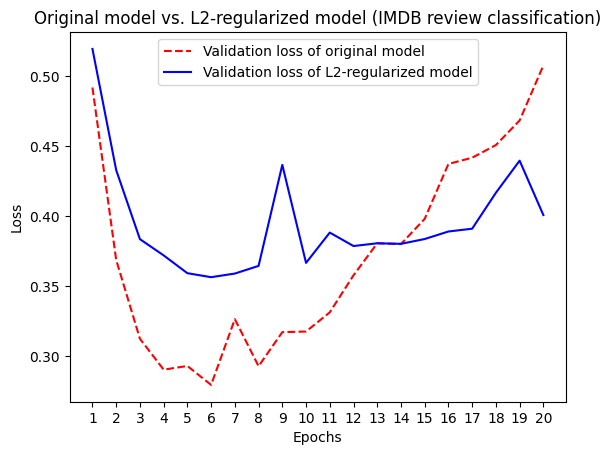

In [ ]:
original_val_loss = history_original.history["val_loss"]
l2_val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    l2_val_loss,
    "b-",
    label="Validation loss of L2-regularized model",
)
plt.title(
    "Original model vs. L2-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()

In [ ]:
from keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

##### Adding dropout

In [ ]:
model = keras.Sequential(
    [
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4,
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6253 - loss: 0.6419 - val_accuracy: 0.8150 - val_loss: 0.5373
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7585 - loss: 0.5361 - val_accuracy: 0.8737 - val_loss: 0.4525
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8158 - loss: 0.4612 - val_accuracy: 0.8791 - val_loss: 0.3863
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8548 - loss: 0.4022 - val_accuracy: 0.8875 - val_loss: 0.3505
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8781 - loss: 0.3528 - val_accuracy: 0.8795 - val_loss: 0.3181
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9002 - loss: 0.3127 - val_accuracy: 0.8891 - val_loss: 0.2946
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9122 - loss: 0.2834 - val_accuracy: 0.8893 - val_loss: 0.2877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9243 - loss: 0.2541 - val_accuracy: 0.8887 - v

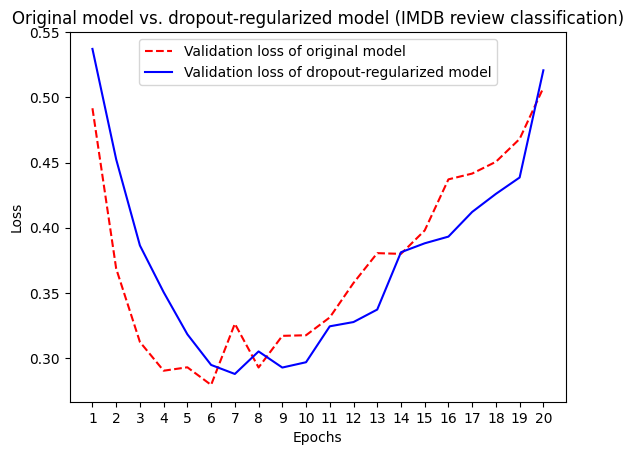

In [ ]:
original_val_loss = history_original.history["val_loss"]
dropout_val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(
    epochs,
    original_val_loss,
    "r--",
    label="Validation loss of original model",
)
plt.plot(
    epochs,
    dropout_val_loss,
    "b-",
    label="Validation loss of dropout-regularized model",
)
plt.title(
    "Original model vs. dropout-regularized model (IMDB review classification)"
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.show()